Name:- **Kirti Vichare**

Roll No:-**1233**

Acute Heart Disease Case Study

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive');


MessageError: ignored

In [ ]:
dataset = pd.read_csv('/content/Heart.csv')

In [ ]:
dataset.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
# display columns of dataset
df=dataset

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [ ]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [ ]:
#description  detalis of object type column
df.describe(include='O')

,ChestPain,Thal,AHD
count,303,301,303
unique,4,3,2
top,asymptomatic,normal,No
freq,144,166,164


In [ ]:
#descriprtion details of numeric type column
df.describe(exclude='O')

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [ ]:
#display row and column of dataset
df.shape


(303, 14)

In [ ]:
print("number of rows in dataset:",df.shape[0])

number of rows in dataset: 303


Feature Engineering

In [ ]:
df.Thal.unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [ ]:
df.Thal.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

replacing null value with mode of column (higest ouccerence)

In [ ]:
df.Thal.value_counts()[0]

166

In [ ]:

df.Thal.value_counts().index[0]

'normal'

In [ ]:
df.Thal=df.Thal.fillna(df.Thal.value_counts().index[0])
df.Thal.value_counts()

normal        168
reversable    117
fixed          18
Name: Thal, dtype: int64

In [ ]:
df.Thal.isnull().sum()

0

In [ ]:
df.Ca.unique()

array([ 0.,  3.,  2.,  1., nan])

In [ ]:
df.Ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

Replace the null values with mode ofthe column

In [ ]:
df.Ca=df.Ca.fillna(0.0)
df.Ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [ ]:
df.Ca=df.Ca.fillna(df.Ca.value_counts().index[0])
df.Ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [ ]:
print(df.ChestPain.unique())
print(df.Thal.unique())
print(df.AHD.unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable']
['No' 'Yes']


In [ ]:
df_encoding = pd.get_dummies(df[['ChestPain','Thal','AHD']])
df_final=pd.concat([df,df_encoding],1)
df_final = df_final.drop(['ChestPain','Thal','AHD'],axis = 1)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0,1,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,0,1,0,0,1,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2.0,1,0,0,0,0,0,1,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1.0,1,0,0,0,0,0,1,0,1
301,57,0,130,236,0,2,174,0,0.0,2,1.0,0,0,1,0,0,1,0,0,1


In [ ]:
df_final.isnull().sum()

Age                       0
Sex                       0
RestBP                    0
Chol                      0
Fbs                       0
RestECG                   0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Slope                     0
Ca                        0
ChestPain_asymptomatic    0
ChestPain_nonanginal      0
ChestPain_nontypical      0
ChestPain_typical         0
Thal_fixed                0
Thal_normal               0
Thal_reversable           0
AHD_No                    0
AHD_Yes                   0
dtype: int64

In [ ]:
df_final.Sex.value_counts()

1    206
0     97
Name: Sex, dtype: int64

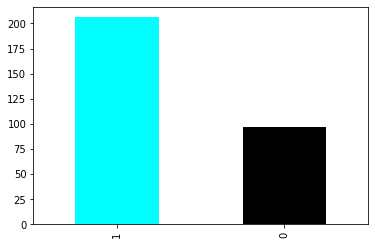

In [ ]:
df_final.Sex.value_counts().plot(kind='bar',color=['cyan','black'])

plt.show()

In [ ]:
df_final.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable', 'AHD_No', 'AHD_Yes'],
      dtype='object')

In [ ]:
ct=pd.crosstab(df_final.AHD_Yes,df_final.Sex)
ct

Sex,0,1
AHD_Yes,,
0,72,92
1,25,114


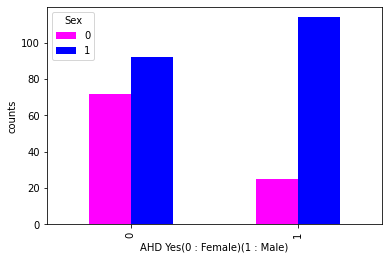

In [ ]:
ct.plot(kind='bar',color=['magenta','blue'])
plt.xlabel("AHD Yes(0 : Female)(1 : Male)")
plt.ylabel("counts")
plt.show()

In [ ]:
df_final.AHD_Yes.value_counts()

0    164
1    139
Name: AHD_Yes, dtype: int64

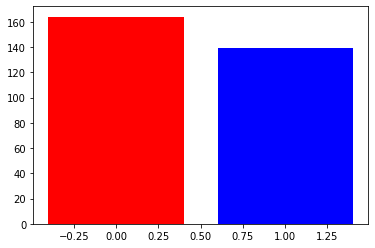

In [ ]:
#df_final.AHD_Yes.value_counts().plot(kind='bar',color=['magenta','blue'])

plt.bar(df_final.AHD_Yes.unique(),df_final.AHD_Yes.value_counts(),color=['r','b'])

plt.show()


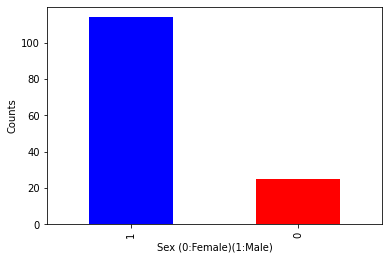

In [ ]:
df_final.Sex[df_final.AHD_Yes==1].value_counts().plot(kind='bar',color=['b','r'])
plt.xlabel("Sex (0:Female)(1:Male)")
plt.ylabel("Counts")
plt.show()

In [ ]:
df_final.corr()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
Age,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.135337,-0.051714,-0.151684,0.045438,0.062042,-0.132264,0.104902,-0.223120,0.223120
Sex,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.086398,-0.117189,-0.037990,0.089828,0.142524,-0.387396,0.326284,-0.276816,0.276816
RestBP,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.027710,-0.050127,-0.083234,0.149737,0.075157,-0.139782,0.106210,-0.150825,0.150825
Chol,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.070343,-0.033223,-0.016453,-0.053021,-0.095743,-0.006479,0.053100,-0.085164,0.085164
Fbs,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,-0.062929,0.087027,-0.060649,0.055511,0.091351,-0.073766,0.030953,-0.025264,0.025264
RestECG,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.122589,-0.089526,-0.102979,0.065581,0.044672,-0.028989,0.007905,-0.169202,0.169202
MaxHR,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.371989,0.159876,0.249415,0.079683,-0.159523,0.285812,-0.214326,0.417167,-0.417167
ExAng,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.464293,-0.266871,-0.233863,-0.093384,0.063073,-0.324082,0.300223,-0.431894,0.431894
Oldpeak,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.274218,-0.126339,-0.277513,0.086959,0.104635,-0.345731,0.302145,-0.424510,0.424510
Slope,0.161770,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.110803,0.209528,-0.103004,-0.202807,0.064509,0.185825,-0.301252,0.217318,-0.339213,0.339213


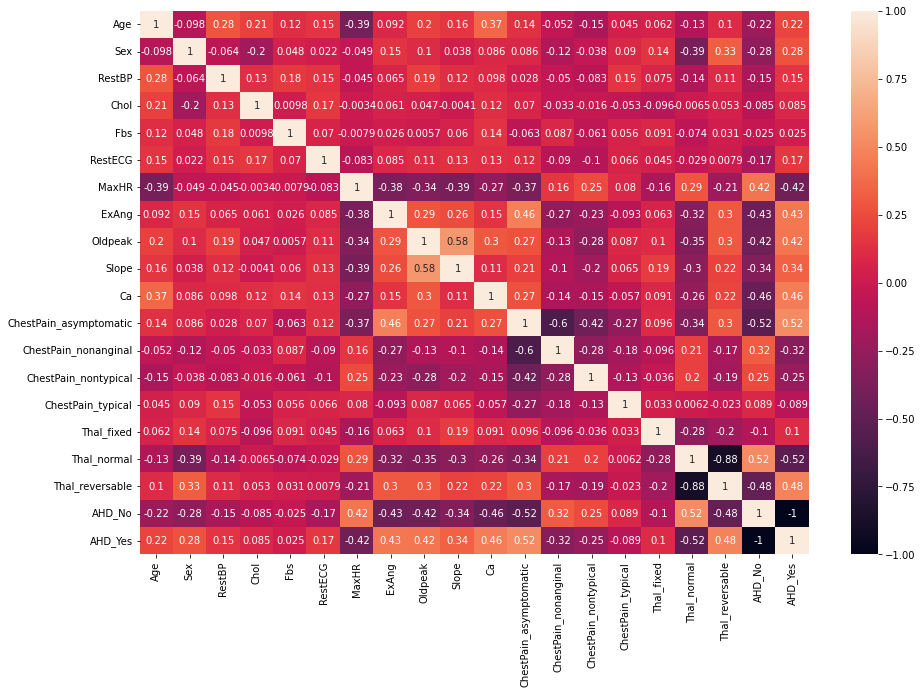

In [ ]:
import seaborn as sns

fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_final.corr(), annot=True)

plt.show()

In [ ]:
df_final = df_final.drop('AHD_No',axis=1)
df_final.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0,0


In [ ]:
df_final.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable', 'AHD_Yes'],
      dtype='object')

## Applying preprocessing-MinMaxScalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMsc=MinMaxScaler()
features=['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable']
df_final[features]=MMsc.fit_transform(df_final[features])
df_final.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,0.708333,1.0,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.791667,1.0,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.791667,1.0,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.166667,1.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.250000,0.0,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
X=df_final.drop('AHD_Yes',axis=1)
y=df_final.AHD_Yes

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# Model

#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score
rft=RandomForestClassifier()
rft.fit(X_train,y_train)
y_pred_rft=rft.predict(X_test)

print("R2 Score for predicted value: ", r2_score(y_test,y_pred_rft))
print("Accuracy Score of RFT: ", accuracy_score(y_test,y_pred_rft))


R2 Score for predicted value:  0.13616557734204793
Accuracy Score of RFT:  0.7868852459016393


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred_rft)
print('Confusion Matrix' )
print(cm)
print("Accuracy Score: ", accuracy_score(y_test,y_pred_rft))
print('_'*20,'Classification Report','-'*20)
print(classification_report(y_test,y_pred_rft))

Confusion Matrix
[[27  7]
 [ 6 21]]
Accuracy Score:  0.7868852459016393
____________________ Classification Report --------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        34
           1       0.75      0.78      0.76        27

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



#AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred_adb=adb.predict(X_test)

print("R2 Score for predicted value: ", r2_score(y_test,y_pred_adb))
print("Accuracy Score of KNN: ", accuracy_score(y_test,y_pred_adb))

R2 Score for predicted value:  0.20261437908496727
Accuracy Score of KNN:  0.8032786885245902


#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gdb= GradientBoostingClassifier()
gdb.fit(X_train,y_train)
y_pred_gdb=gdb.predict(X_test)

print("R2 Score for predicted value: ", r2_score(y_test,y_pred_gdb))
print("Accuracy Score of KNN: ", accuracy_score(y_test,y_pred_gdb))

R2 Score for predicted value:  0.0032679738562091387
Accuracy Score of KNN:  0.7540983606557377


#XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score,accuracy_score

xgb= XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

print("R2 Score for predicted value: ", r2_score(y_test,y_pred_xgb))
print("Accuracy Score of XGB: ", accuracy_score(y_test,y_pred_xgb))

R2 Score for predicted value:  0.13616557734204793
Accuracy Score of XGB:  0.7868852459016393


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred_xgb)
print('Confusion Matrix' )
print(cm)
print("Accuracy Score: ", accuracy_score(y_test,y_pred_xgb))
print('_'*20,'Classification Report','-'*20)
print(classification_report(y_test,y_pred_xgb))

Confusion Matrix
[[27  7]
 [ 6 21]]
Accuracy Score:  0.7868852459016393
____________________ Classification Report --------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        34
           1       0.75      0.78      0.76        27

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61

